<a href="https://colab.research.google.com/github/as2c/MLP---Cosmology/blob/main/NN/NN_Keras_Multi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this code, our objective is to train some neural network models on our test data.

### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import timeit
import time
%alias_magic t timeit

plt.style.use('seaborn-talk')

from matplotlib import rcParams

# import warnings filter
from warnings import simplefilter 
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

Created `%t` as an alias for `%timeit`.
Created `%%t` as an alias for `%%timeit`.


In [2]:
SMALL_SIZE = 10
MEDIUM_SIZE = 15
BIGGER_SIZE = 18
plt.rc('figure', figsize=(10,6))
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)     # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)     # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)   # fontsize of the figure title

# Import phase I data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Gadget 2 Data / with Neutrino

In [4]:
data = pd.read_csv(r'/content/drive/MyDrive/denc_Neutrino')
# data['in_halo'] = (data['haloID']>0).astype('int')
data['in_halo'] = (data['halo_mass']>1600).astype('int32')
data

,id,haloID,halo_mass,vx,vy,vz,dc for 4.9,dc for 6.8,dc for 8.7,dc for 10.6,dc for 12.4,dc for 14.3,dc for 16.2,dc for 18.1,dc for 20.0,in_halo
0,10156552,755,2280.0,171.21194,220.56293,-274.228700,-0.084922,-0.052028,-0.042415,-0.028087,-0.024984,-0.018675,-0.016231,-0.011940,-0.010111,1
1,11068486,85,1539.0,-129.84116,92.60424,212.125500,-0.127820,-0.081099,-0.051217,-0.028345,-0.013751,-0.013991,-0.012344,-0.011500,-0.012220,0
2,9530036,654,1944.0,-290.99210,-885.49430,468.255040,-0.078978,-0.052806,-0.030027,-0.011704,0.001295,0.003803,0.005131,0.005231,0.003787,1
3,11455022,752,1394.0,-60.35258,422.43716,79.394300,-0.109989,-0.079155,-0.054663,-0.037685,-0.026670,-0.017901,-0.009227,-0.000868,0.001568,0
4,8591034,356,1649.0,403.66608,345.88077,9.231552,-0.084405,-0.019068,-0.009396,-0.001539,0.002288,0.005629,0.011288,0.013111,0.013433,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2160800,451,2634.0,654.82430,210.78130,255.344150,-0.094225,-0.076043,-0.060624,-0.040368,-0.020840,-0.016261,-0.011803,-0.005002,0.000918,1
99996,3257728,43,1112.0,-154.27774,488.65564,-779.558400,-0.127045,-0.076529,-0.056246,-0.038201,-0.027520,-0.016374,-0.008045,0.002627,0.006124,0
99997,6101605,484,1198.0,-113.51735,68.44336,275.964000,-0.122135,-0.091794,-0.063465,-0.032060,-0.017973,-0.016684,-0.017740,-0.017154,-0.012600,0
99998,4576456,44,1058.0,-130.21120,292.63483,-754.563000,-0.097585,-0.076140,-0.061788,-0.054584,-0.043055,-0.032415,-0.021591,-0.007463,0.004673,0


In [5]:
data.describe()

,id,haloID,halo_mass,vx,vy,vz,dc for 4.9,dc for 6.8,dc for 8.7,dc for 10.6,dc for 12.4,dc for 14.3,dc for 16.2,dc for 18.1,dc for 20.0,in_halo
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,8.716004e+06,424.627710,2369.299450,35.207601,-13.728656,97.821939,-0.107338,-0.062074,-0.038666,-0.025951,-0.017900,-0.011968,-0.007224,-0.003341,-0.000224,0.557930
std,3.549230e+06,230.962533,1856.527585,364.820655,369.919751,373.578625,0.020301,0.020965,0.019921,0.018106,0.015956,0.013969,0.012346,0.011069,0.010084,0.496635
min,2.131444e+06,16.000000,241.000000,-1247.932500,-1462.806300,-1250.519700,-0.127820,-0.099572,-0.083351,-0.072824,-0.065316,-0.058751,-0.050519,-0.043771,-0.038371,0.000000
25%,5.953820e+06,238.000000,1194.000000,-226.284345,-254.656135,-145.829085,-0.124202,-0.077891,-0.052474,-0.038510,-0.028860,-0.021233,-0.015384,-0.010712,-0.006964,0.000000
50%,9.043250e+06,418.000000,1791.000000,32.857450,-4.815737,101.883413,-0.113607,-0.063404,-0.039434,-0.026100,-0.017784,-0.011980,-0.007369,-0.003743,-0.000713,1.000000
75%,1.176120e+07,619.000000,2945.000000,284.168098,238.543252,350.062135,-0.095776,-0.048722,-0.025370,-0.013587,-0.006677,-0.002087,0.001081,0.004249,0.006694,1.000000
max,1.464652e+07,870.000000,10101.000000,1314.092800,1256.822900,1355.984900,0.017155,0.032463,0.044346,0.040490,0.042179,0.036009,0.033482,0.034145,0.032602,1.000000


### Gadget 2 Data / without Neutrino

In [6]:
data_cdm = pd.read_csv(r'/content/drive/MyDrive/denc_CDM')
data_cdm['in_halo'] = (data_cdm['halo_mass']>1600).astype('int32')
data_cdm

,id,haloID,halo_mass,vx,vy,vz,dc for 4.9,dc for 6.8,dc for 8.7,dc for 10.6,dc for 12.4,dc for 14.3,dc for 16.2,dc for 18.1,dc for 20.0,in_halo
0,8981131,414,1504.0,252.710050,-464.239500,509.94550,2.817576,2.780794,2.746420,2.446413,2.000415,1.533108,1.083378,0.691070,0.457584,0
1,9901676,1026,1013.0,-167.701370,499.161740,156.32635,2.690323,2.102417,1.805493,1.485764,1.267945,1.083753,0.849938,0.617267,0.431845,0
2,8288987,1079,727.0,46.129280,19.954561,164.61870,1.010590,0.821528,0.559744,0.220796,0.003400,-0.094805,-0.074599,0.003315,0.076079,0
3,4842631,675,1268.0,-234.629320,349.021400,-690.46674,1.889611,1.180236,0.495534,0.064434,-0.232441,-0.389582,-0.407908,-0.334146,-0.231578,0
4,12884124,437,6128.0,146.780670,-180.209270,-558.39777,2.676619,1.734870,0.906903,0.464721,0.187801,0.057663,0.029529,0.049055,0.101472,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,12466311,1085,5542.0,25.253933,-580.586850,113.06337,1.482403,1.068278,0.857863,0.583947,0.327563,0.212553,0.139374,0.103515,0.090791,1
99996,11857185,491,691.0,-423.371550,138.109020,-300.80450,-0.209077,-0.534490,-0.724460,-0.749430,-0.743152,-0.663805,-0.511928,-0.347015,-0.253660,0
99997,9340191,947,868.0,225.385210,-9.085627,318.22006,1.086942,0.492283,0.114506,-0.050883,-0.161068,-0.168421,-0.159639,-0.175261,-0.202931,0
99998,13317963,1034,1175.0,-55.431606,16.332230,-898.90326,0.339088,-0.085185,-0.248881,-0.328230,-0.343797,-0.306353,-0.275684,-0.282089,-0.284524,0


### Neutrino Labels

In [7]:
### Labeling Based on Mass of Halos

data['in_halo'] = np.zeros(len(data), dtype=int)
mass = data['halo_mass']
j = 0


##_______________________________________________________
# n = min(data['halo_mass'])
# for m in np.logspace(2.8, 4, 5, endpoint=False):
#     inclass = (mass > m).astype('int32')
#     data['in_halo'] += inclass
#     num = np.sum(data['in_halo']==j)
#     print(f'class {j} ({n} < mass < {int(m)} ): {num}')
#     j+=1
#     n = int(m)
# num = np.sum(data['in_halo']==j)
# print(f'class {j} ({n} < mass ): {num}') 
##_______________________________________________________

m1 = 1100
m2 = 1500
m3 = 2000
m4 = 3300
data['in_halo'] = data['in_halo'].astype('int32') + (mass>m1).astype('int32') + (mass>m2).astype('int32') + (mass>m3).astype('int32') + (mass>m4).astype('int32')

for i in range(5):
    num = np.sum(data['in_halo']==j)
    print(f'class {j} : {num}')
    j+=1
    n = int(i)
print(data.in_halo)

class 0 : 21863
class 1 : 18723
class 2 : 16003
class 3 : 24472
class 4 : 18939
0        3
1        2
2        2
3        1
4        2
        ..
99995    3
99996    1
99997    1
99998    0
99999    4
Name: in_halo, Length: 100000, dtype: int32


### CDM Labels

In [8]:
### Labeling Based on Mass of Halos

data_cdm['in_halo'] = np.zeros(len(data_cdm), dtype=int)
mass = data_cdm['halo_mass']
j = 0

m1 = 1100
m2 = 1600
m3 = 2700
m4 = 4000
data_cdm['in_halo'] = data_cdm['in_halo'].astype('int32') + (mass>m1).astype('int32') + (mass>m2).astype('int32') + (mass>m3).astype('int32') + (mass>m4).astype('int32')

for i in range(5):
    num = np.sum(data_cdm['in_halo']==j)
    print(f'class {j} : {num}')
    j+=1
    n = int(i)
print(data_cdm.in_halo)

class 0 : 20677
class 1 : 20403
class 2 : 18370
class 3 : 19662
class 4 : 20888
0        1
1        0
2        0
3        1
4        4
        ..
99995    4
99996    0
99997    0
99998    1
99999    0
Name: in_halo, Length: 100000, dtype: int32


## Define Datasets

In [9]:
## Neutrino
X = data.iloc[:,3:15].astype('float32').values
Y = data.in_halo.astype('int32').values

In [10]:
## CDM
X2 = data_cdm.iloc[:,3:15].astype('float32').values
Y2 = data_cdm.in_halo.astype('int32').values

In [11]:
## Scale / Neutrino
X = (X - np.mean(X))/np.std(X)

In [12]:
## Scale / CDM
X2 = (X2 - np.mean(X2))/np.std(X2)

In [13]:
## Split into test and train / Neutrino

tst_size = 0.2
ns, nf = np.shape(X) 
X_train, X_test, Y_train, Y_test = train_test_split(*shuffle(X, Y, n_samples = ns, random_state=0) , random_state=0, test_size =tst_size )
print('X_train :',len(X_train),'   X_test :',len(X_test))

X_train : 80000    X_test : 20000


In [14]:
## Split into test and train / CDM

tst_size = 0.2
ns, nf = np.shape(X) 
X2_train, X2_test, Y2_train, Y2_test = train_test_split(*shuffle(X2, Y2, n_samples = ns, random_state=0) , random_state=0, test_size =tst_size )
print('X2_train :',len(X2_train),'   X2_test :',len(X2_test))

X2_train : 80000    X2_test : 20000


In [15]:
# Frequency of 1-class / Neutrino
print("{} % of the stored data has class 1 ".format(100*Y.sum()/len(Y)))

199.901 % of the stored data has class 1 


In [16]:
# Frequency of 1-class / CDM
print("{} % of the stored data has class 1 ".format(100*Y2.sum()/len(Y2)))

199.681 % of the stored data has class 1 


# Keras Model / Multi-Class

## Building the Model

In [17]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.losses import MeanSquaredError
from sklearn.metrics import classification_report


model = keras.Sequential()
model.add(layers.Dense(30,activation='relu', input_shape=(12, )))
model.add(layers.Dense(10,kernel_initializer=keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=1), input_shape=(12,),activation='tanh'))
model.add(keras.layers.Dense(5))


model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer = keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-06), metrics=['accuracy'])

## Keras on Neutrino

In [18]:
hist1 = model.fit(
    X_train,
    Y_train,
    batch_size= 100,
    epochs=20,
    verbose=2,
    validation_split=.2,
    shuffle=True,
)

Epoch 1/20
640/640 - 4s - loss: 1.5583 - accuracy: 0.2850 - val_loss: 1.5464 - val_accuracy: 0.2932 - 4s/epoch - 6ms/step
Epoch 2/20
640/640 - 2s - loss: 1.5415 - accuracy: 0.2987 - val_loss: 1.5357 - val_accuracy: 0.3054 - 2s/epoch - 4ms/step
Epoch 3/20
640/640 - 2s - loss: 1.5348 - accuracy: 0.3041 - val_loss: 1.5297 - val_accuracy: 0.3042 - 2s/epoch - 3ms/step
Epoch 4/20
640/640 - 2s - loss: 1.5294 - accuracy: 0.3071 - val_loss: 1.5272 - val_accuracy: 0.3037 - 2s/epoch - 3ms/step
Epoch 5/20
640/640 - 3s - loss: 1.5262 - accuracy: 0.3098 - val_loss: 1.5317 - val_accuracy: 0.3016 - 3s/epoch - 4ms/step
Epoch 6/20
640/640 - 2s - loss: 1.5251 - accuracy: 0.3070 - val_loss: 1.5305 - val_accuracy: 0.3072 - 2s/epoch - 4ms/step
Epoch 7/20
640/640 - 2s - loss: 1.5231 - accuracy: 0.3086 - val_loss: 1.5220 - val_accuracy: 0.3091 - 2s/epoch - 4ms/step
Epoch 8/20
640/640 - 2s - loss: 1.5211 - accuracy: 0.3106 - val_loss: 1.5241 - val_accuracy: 0.3059 - 2s/epoch - 3ms/step
Epoch 9/20
640/640 - 1s 

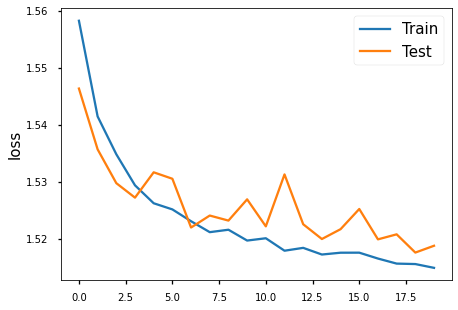

In [19]:
fig = plt.figure(figsize=(7,5))

ax1 = fig.add_subplot(1,1,1, ylabel= 'loss')
ax1.plot(hist1.history['loss'])
ax1.plot(hist1.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

### Cross-Validation

In [26]:
def model_fn():
    from tensorflow import keras
    from tensorflow.keras import layers
    from keras.losses import MeanSquaredError
    from sklearn.metrics import classification_report


    model = keras.Sequential()
    model.add(layers.Dense(30,kernel_initializer=keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=1),activation='relu'))
    model.add(layers.Dense(10,kernel_initializer=keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=1), input_shape=(12,),activation='tanh'))
    model.add(keras.layers.Dense(5))
    
    model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer = keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-06), metrics=['accuracy'])
    return model

In [28]:
epch = 25
batch_sz = 500

from sklearn.model_selection import KFold
n_folds = 3
kf = KFold(n_splits=n_folds, shuffle=True)


loss = []
acc = []
val_loss = []
val_acc = []

# cross validate:
for train_index, val_index in kf.split(X):
    model= model_fn()
    hist = model.fit(X[train_index], Y[train_index],
                     epochs=epch,
                     batch_size=500,
                     validation_data = (X[val_index], Y[val_index]),
                     verbose=0)
    loss.append(hist.history['loss'])
    acc.append(hist.history['accuracy'])
    val_loss.append([hist.history['val_loss']])
    val_acc.append(hist.history['val_accuracy'])
    
loss = np.array(loss).reshape(n_folds, epch )    
acc = np.array(acc).reshape(n_folds, epch )       
val_loss = np.array(val_loss).reshape(n_folds, epch )      
val_acc  = np.array(val_acc).reshape(n_folds, epch )       

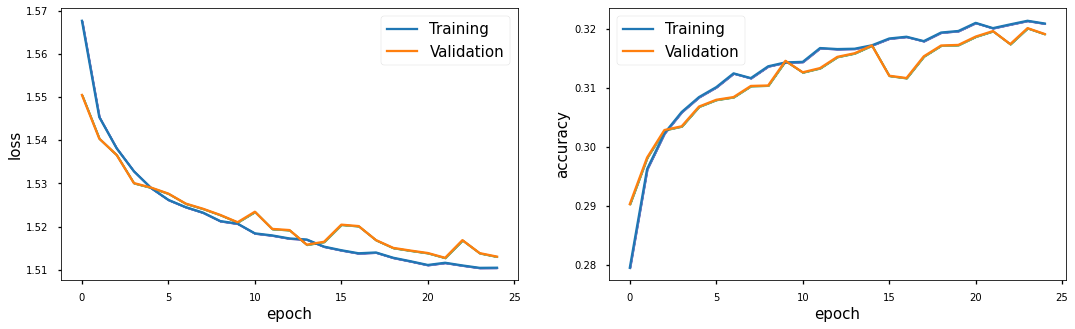

In [29]:
loss_m = loss.mean(axis=0)
loss_s = loss.var(axis=0)
acc_m = acc.mean(axis=0)
acc_s = acc.var(axis=0)

val_loss_m = val_loss.mean(axis=0)
val_loss_s = val_loss.var(axis=0)
val_acc_m = val_acc.mean(axis=0)
val_acc_s = val_acc.var(axis=0)

plt.figure(figsize=(18,5))

ax1 = plt.subplot(1,2,1, ylabel='loss', xlabel='epoch')
ax1.plot(loss_m, label = 'Training')
ax1.fill_between(range(len(loss_m)),loss_m-loss_s/2, loss_m+loss_s/2,color="darkblue", lw=2,alpha=0.5)
ax1.plot(val_loss_m, label = 'Validation')
ax1.fill_between(range(len(loss_m)),val_loss_m-loss_s/2, val_loss_m+loss_s/2,color="darkgreen", lw=2,alpha=0.5)
plt.legend(loc=0)

ax2 = plt.subplot(1,2,2, ylabel='accuracy', xlabel='epoch')
ax2.plot(acc_m, label = 'Training')
ax2.fill_between(range(len(acc_m)),acc_m-acc_s/2, acc_m+acc_s/2,color="darkblue", lw=2,alpha=0.5)
ax2.plot(val_acc_m, label = 'Validation')
ax2.fill_between(range(len(acc_m)),val_acc_m-acc_s/2, val_acc_m+acc_s/2,color="darkgreen", lw=2,alpha=0.5)

plt.legend(loc=0)
plt.show()



### Tune HP

In [ ]:
!pip install -q -U keras-tuner
import keras_tuner as kt

     |████████████████████████████████| 98 kB 3.1 MB/s 


In [ ]:
# https://www.tensorflow.org/tutorials/keras/keras_tuner
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(12, )))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=12, max_value=40, step=2)
  model.add(keras.layers.Dense(units=hp_units, 
                               activation='relu', 
                               kernel_regularizer=keras.regularizers.l2(.05)))
  model.add(keras.layers.Dense(units=hp_units, 
                               activation='tanh', 
                               kernel_regularizer=keras.regularizers.l2(.05)))
  model.add(keras.layers.Dense(5))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 2e-2])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     project_name='kt1')

In [ ]:
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
tuner.search(X_train, Y_train, 
             epochs=50, 
             batch_size = 100, 
             validation_split=0.2, 
             callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 30 Complete [00h 00m 16s]
val_accuracy: 0.28025001287460327

Best val_accuracy So Far: 0.28331249952316284
Total elapsed time: 00h 04m 48s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 36 and the optimal learning rate for the optimizer
is 0.0001.



### Best Model

In [ ]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, Y_train, 
                    epochs=30, 
                    batch_size = 100, 
                    validation_data=(X_test, Y_test))

val_acc_per_epoch = history.history['val_accuracy']
best_n = max(val_acc_per_epoch)
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/30
800/800 [==============================] - 6s 6ms/step - loss: 3.5338 - accuracy: 0.2426 - val_loss: 2.8721 - val_accuracy: 0.2692
Epoch 2/30
800/800 [==============================] - 2s 2ms/step - loss: 2.4648 - accuracy: 0.2706 - val_loss: 2.1375 - val_accuracy: 0.2747
Epoch 3/30
800/800 [==============================] - 2s 2ms/step - loss: 1.9461 - accuracy: 0.2699 - val_loss: 1.7951 - val_accuracy: 0.2684
Epoch 4/30
800/800 [==============================] - 2s 2ms/step - loss: 1.7166 - accuracy: 0.2650 - val_loss: 1.6556 - val_accuracy: 0.2630
Epoch 5/30
800/800 [==============================] - 2s 2ms/step - loss: 1.6300 - accuracy: 0.2617 - val_loss: 1.6087 - val_accuracy: 0.2601
Epoch 6/30
800/800 [==============================] - 2s 2ms/step - loss: 1.6034 - accuracy: 0.2580 - val_loss: 1.5963 - val_accuracy: 0.2654
Epoch 7/30
800/800 [==============================] - 2s 2ms/step - loss: 1.5966 - accuracy: 0.2594 - val_loss: 1.5930 - val_accuracy: 0.2627
Epoch 

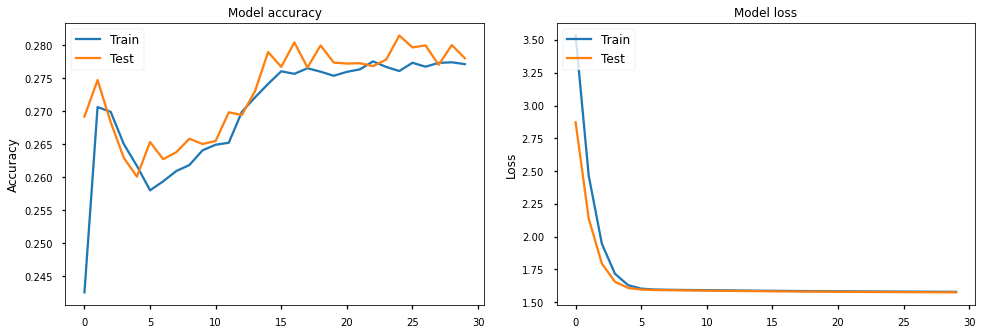

In [ ]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

### Classification Report

In [ ]:
from sklearn.metrics import classification_report
clf_report_n = classification_report(Y_test, model.predict(X_test).argmax(axis=1))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm_n = confusion_matrix(Y_test, model.predict(X_test).argmax(axis=1))

## Keras on CDM

In [ ]:
hist2 = model.fit(
    X2_train,
    Y2_train,
    batch_size= 100,
    epochs=20,
    verbose=2,
    validation_split=.2,
    shuffle=True,
)

Epoch 1/20
640/640 - 2s - loss: 1.5785 - accuracy: 0.2766 - val_loss: 1.5796 - val_accuracy: 0.2801 - 2s/epoch - 3ms/step
Epoch 2/20
640/640 - 2s - loss: 1.5783 - accuracy: 0.2781 - val_loss: 1.5791 - val_accuracy: 0.2781 - 2s/epoch - 3ms/step
Epoch 3/20
640/640 - 2s - loss: 1.5781 - accuracy: 0.2764 - val_loss: 1.5788 - val_accuracy: 0.2789 - 2s/epoch - 3ms/step
Epoch 4/20
640/640 - 1s - loss: 1.5778 - accuracy: 0.2782 - val_loss: 1.5789 - val_accuracy: 0.2792 - 1s/epoch - 2ms/step
Epoch 5/20
640/640 - 1s - loss: 1.5776 - accuracy: 0.2775 - val_loss: 1.5786 - val_accuracy: 0.2781 - 1s/epoch - 2ms/step
Epoch 6/20
640/640 - 1s - loss: 1.5774 - accuracy: 0.2775 - val_loss: 1.5785 - val_accuracy: 0.2804 - 1s/epoch - 2ms/step
Epoch 7/20
640/640 - 1s - loss: 1.5772 - accuracy: 0.2765 - val_loss: 1.5784 - val_accuracy: 0.2792 - 1s/epoch - 2ms/step
Epoch 8/20
640/640 - 1s - loss: 1.5769 - accuracy: 0.2778 - val_loss: 1.5778 - val_accuracy: 0.2786 - 1s/epoch - 2ms/step
Epoch 9/20
640/640 - 1s 

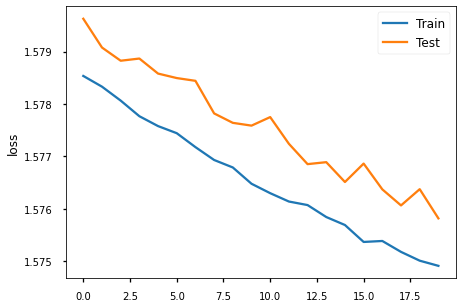

In [ ]:
fig = plt.figure(figsize=(7,5))

ax1 = fig.add_subplot(1,1,1, ylabel= 'loss')
ax1.plot(hist2.history['loss'])
ax1.plot(hist2.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

### Cross-Validation

In [23]:
def model_fn():
    from tensorflow import keras
    from tensorflow.keras import layers
    from keras.losses import MeanSquaredError
    from sklearn.metrics import classification_report


    model = keras.Sequential()
    model.add(layers.Dense(30,kernel_initializer=keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=1),activation='relu'))
    model.add(layers.Dense(10,kernel_initializer=keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=1), input_shape=(12,),activation='tanh'))
    model.add(keras.layers.Dense(5))
    
    model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer = keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-06), metrics=['accuracy'])
    return model

In [24]:
epch = 10
batch_sz = 500

from sklearn.model_selection import KFold
n_folds = 3
kf = KFold(n_splits=n_folds, shuffle=True)


loss = []
acc = []
val_loss = []
val_acc = []

# cross validate:
for train_index, val_index in kf.split(X2):
    model = model_fn()
    hist = model.fit(X2[train_index], Y2[train_index],
                     epochs=epch,
                     batch_size=500,
                     validation_data = (X2[val_index], Y2[val_index]),
                     verbose=0)
    loss.append(hist.history['loss'])
    acc.append(hist.history['accuracy'])
    val_loss.append([hist.history['val_loss']])
    val_acc.append(hist.history['val_accuracy'])
    
loss = np.array(loss).reshape(n_folds, epch )    
acc = np.array(acc).reshape(n_folds, epch )       
val_loss = np.array(val_loss).reshape(n_folds, epch )      
val_acc  = np.array(val_acc).reshape(n_folds, epch )       

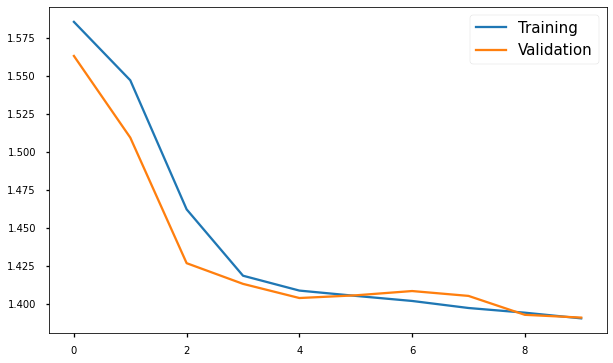

In [25]:
loss_m = loss.mean(axis=0)
loss_s = loss.var(axis=0)


val_loss_m = val_loss.mean(axis=0)
val_loss_s = val_loss.var(axis=0)

plt.plot(loss_m, label = 'Training')
plt.fill_between(range(len(loss_m)),loss_m-loss_s/2, loss_m+loss_s/2)
plt.plot(val_loss_m, label = 'Validation')
plt.fill_between(range(len(loss_m)),val_loss_m-loss_s/2, val_loss_m+loss_s/2)
plt.legend(loc=0)
plt.show()

### Tuning HP

#### GridSearch

In [ ]:
def model_fn(dense_layer_sizes, regularizations, lr=.1): #dropouts
    model = keras.Sequential() 
    
    # model.add( keras.layers.Flatten(input_shape=(12, )) )
    
    for i in range( len(dense_layer_sizes )):
        model.add( keras.layers.Dense( dense_layer_sizes[i], 
                                      activation='relu', 
                                      kernel_regularizer=keras.regularizers.l2(regularizations) 
                                     ) )
    model.add(keras.layers.Dense(dense_layer_sizes[i], 
                            activation='tanh', 
                            kernel_regularizer=keras.regularizers.l2(regularizations)))
        # model.add(keras.layers.Dropout( dropouts ) )
        
       
    model.add(keras.layers.Dense(5))
        
    model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                  optimizer=keras.optimizers.Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-06), 
                  metrics=['accuracy'])
    

    return model

mdl = model_fn([30,20], .001, .1) #.001
# mdl = model_fn([128], [.01], [.01])
# mdl.summary()

In [ ]:
btch_size = 500
epch = 8
history = mdl.fit(X2_train, Y2_train, batch_size=btch_size, epochs=epch )

Epoch 1/8
160/160 [==============================] - 1s 4ms/step - loss: 1.6123 - accuracy: 0.2605
Epoch 2/8
160/160 [==============================] - 1s 3ms/step - loss: 1.5777 - accuracy: 0.2713
Epoch 3/8
160/160 [==============================] - 1s 6ms/step - loss: 1.5781 - accuracy: 0.2682
Epoch 4/8
160/160 [==============================] - 1s 5ms/step - loss: 1.5785 - accuracy: 0.2693
Epoch 5/8
160/160 [==============================] - 0s 2ms/step - loss: 1.5792 - accuracy: 0.2696
Epoch 6/8
160/160 [==============================] - 0s 2ms/step - loss: 1.5780 - accuracy: 0.2667
Epoch 7/8
160/160 [==============================] - 0s 3ms/step - loss: 1.5749 - accuracy: 0.2706
Epoch 8/8
160/160 [==============================] - 0s 3ms/step - loss: 1.5750 - accuracy: 0.2712


In [ ]:
# Grid search over these:
dense_size_candidates = [[40,30,30], [30,10] , [30,10,10] ] # the lists contain the number of nodes for each layer
regularizations_candidates = [ (.01), (.001) ]
# dropouts_candidates = [  (.005), (.01), (.003) ]
lr_candidates = [.1, .01, .001]
# epch_list = [4, 10]
batch_size_candidates = [500,300]

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV

gs_classifier = KerasClassifier(model_fn)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  if sys.path[0] == '':


In [ ]:
validator = GridSearchCV(gs_classifier,
                         param_grid={'dense_layer_sizes': dense_size_candidates,
                                     # epochs is avail for tuning even when not
                                     # an argument to model building function
                                     'epochs': [3],
                                     'regularizations': regularizations_candidates,
                                    #  'dropouts': dropouts_candidates,
                                     'lr': lr_candidates},
                         scoring='accuracy',
                         n_jobs= 1,  )
validator.fit(X2_train, Y2_train)

Epoch 1/3
2000/2000 [==============================] - 8s 3ms/step - loss: 1.6323 - accuracy: 0.2222
Epoch 2/3
2000/2000 [==============================] - 4s 2ms/step - loss: 1.6253 - accuracy: 0.2216
Epoch 3/3
2000/2000 [==============================] - 4s 2ms/step - loss: 1.6216 - accuracy: 0.2284
Epoch 1/3
2000/2000 [==============================] - 5s 2ms/step - loss: 1.6261 - accuracy: 0.2232
Epoch 2/3
2000/2000 [==============================] - 4s 2ms/step - loss: 1.6243 - accuracy: 0.2200
Epoch 3/3
2000/2000 [==============================] - 5s 2ms/step - loss: 1.6232 - accuracy: 0.2233
Epoch 1/3
2000/2000 [==============================] - 6s 2ms/step - loss: 1.6285 - accuracy: 0.2260
Epoch 2/3
2000/2000 [==============================] - 4s 2ms/step - loss: 1.6255 - accuracy: 0.2234
Epoch 3/3
2000/2000 [==============================] - 5s 2ms/step - loss: 1.6246 - accuracy: 0.2268
Epoch 1/3
2000/2000 [==============================] - 5s 2ms/step - loss: 1.6287 - accurac

GridSearchCV(estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f07590e1290>,
             n_jobs=1,
             param_grid={'dense_layer_sizes': [[40, 30, 30], [30, 10],
                                               [30, 10, 10]],
                         'epochs': [3], 'lr': [0.1, 0.01, 0.001],
                         'regularizations': [0.01, 0.001]},
             scoring='accuracy')

In [ ]:
from sklearn.metrics import SCORERS as s
sorted(s.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [ ]:
print('The parameters of the best model are: ')
print(validator.best_params_)

# validator.best_estimator_ returns sklearn-wrapped version of best model.
# validator.best_estimator_.model returns the (unwrapped) keras model
best_model = validator.best_estimator_

The parameters of the best model are: 
{'dense_layer_sizes': [40, 30, 30], 'epochs': 3, 'lr': 0.001, 'regularizations': 0.001}


In [ ]:
epch = 1000
hist = best_model.fit(X2_test, Y2_test, batch_size=500, epochs=epch , verbose=0)

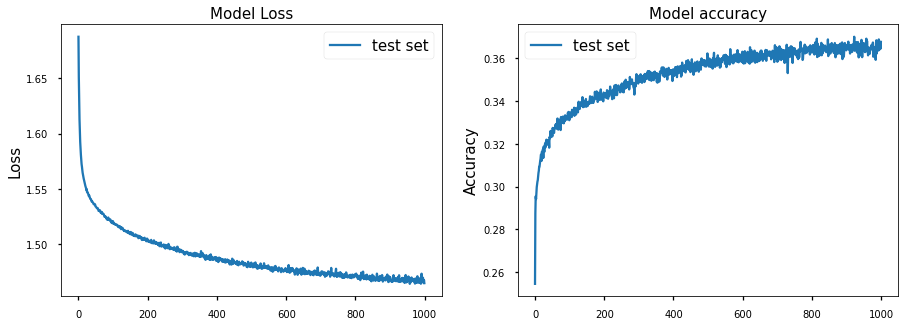

In [ ]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1,2,1, title='Model Loss', ylabel= 'Loss')
ax1.plot(hist.history['loss'], label='test set')
plt.legend(loc=0)

ax2 = fig.add_subplot(1,2,2, title = 'Model accuracy', ylabel= 'Accuracy')
ax2.plot(hist.history['accuracy'], label='test set')
plt.legend(loc=0)
plt.show()

In [ ]:
val_acc_per_epoch = hist.history['accuracy']
best_CDM_1 = max(val_acc_per_epoch)
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))
print('Best accuracy: %f' %(best_CDM_1,))

Best epoch: 923
Best accuracy: 0.370150


####KerasTuner

In [ ]:
# https://www.tensorflow.org/tutorials/keras/keras_tuner
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(12, )))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=12, max_value=40, step=2)
  model.add(keras.layers.Dense(units=hp_units, 
                               activation='relu', 
                               kernel_regularizer=keras.regularizers.l2(.05)))
  model.add(keras.layers.Dense(units=hp_units, 
                               activation='tanh', 
                               kernel_regularizer=keras.regularizers.l2(.05)))
  model.add(keras.layers.Dense(5))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 2e-2])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     project_name='kt2')

In [ ]:
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
tuner.search(X2_train, Y2_train, 
             epochs=50, 
             batch_size = 100, 
             validation_split=0.2, 
             callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 30 Complete [00h 00m 42s]
val_accuracy: 0.2826874852180481

Best val_accuracy So Far: 0.2826874852180481
Total elapsed time: 00h 06m 19s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 30 and the optimal learning rate for the optimizer
is 0.001.



### Best Model

In [ ]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(X2_train, Y2_train, 
                    epochs=30, 
                    batch_size = 100, 
                    validation_data=(X2_test, Y2_test))

val_acc_per_epoch = history.history['val_accuracy']
best_CDM = max(val_acc_per_epoch)
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/30
800/800 [==============================] - 2s 2ms/step - loss: 1.9352 - accuracy: 0.2613 - val_loss: 1.5936 - val_accuracy: 0.2504
Epoch 2/30
800/800 [==============================] - 2s 2ms/step - loss: 1.5941 - accuracy: 0.2591 - val_loss: 1.5897 - val_accuracy: 0.2594
Epoch 3/30
800/800 [==============================] - 2s 2ms/step - loss: 1.5903 - accuracy: 0.2693 - val_loss: 1.5855 - val_accuracy: 0.2702
Epoch 4/30
800/800 [==============================] - 2s 2ms/step - loss: 1.5862 - accuracy: 0.2749 - val_loss: 1.5801 - val_accuracy: 0.2763
Epoch 5/30
800/800 [==============================] - 2s 2ms/step - loss: 1.5829 - accuracy: 0.2746 - val_loss: 1.5785 - val_accuracy: 0.2831
Epoch 6/30
800/800 [==============================] - 2s 2ms/step - loss: 1.5805 - accuracy: 0.2768 - val_loss: 1.5754 - val_accuracy: 0.2779
Epoch 7/30
800/800 [==============================] - 2s 2ms/step - loss: 1.5788 - accuracy: 0.2782 - val_loss: 1.5730 - val_accuracy: 0.2789
Epoch 

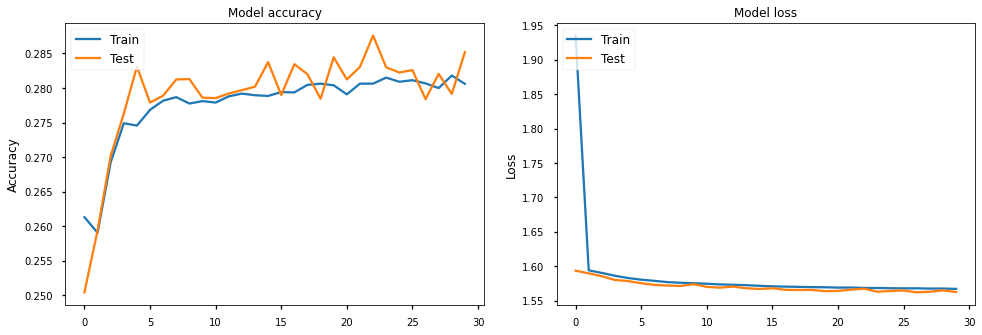

In [ ]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
!pip install

### Classification Report

In [ ]:
from sklearn.metrics import classification_report
clf_report_CDM = classification_report(Y2_test, model.predict(X2_test).argmax(axis=1))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm_CDM = confusion_matrix(Y2_test, model.predict(X2_test).argmax(axis=1))

## Compare Results

Best Accuracy on Neutrino: 0.2815000116825104
              precision    recall  f1-score   support

           0       0.23      0.10      0.13      4429
           1       0.25      0.25      0.25      3719
           2       0.00      0.00      0.00      3208
           3       0.29      0.66      0.40      4931
           4       0.30      0.26      0.28      3713

    accuracy                           0.28     20000
   macro avg       0.21      0.25      0.21     20000
weighted avg       0.22      0.28      0.23     20000

--------------------
Best Accuracy on CDM: 0.28760001063346863
              precision    recall  f1-score   support

           0       0.23      0.14      0.18      4429
           1       0.28      0.18      0.22      3719
           2       0.00      0.00      0.00      3208
           3       0.30      0.58      0.40      4931
           4       0.29      0.41      0.34      3713

    accuracy                           0.29     20000
   macro avg       0.2

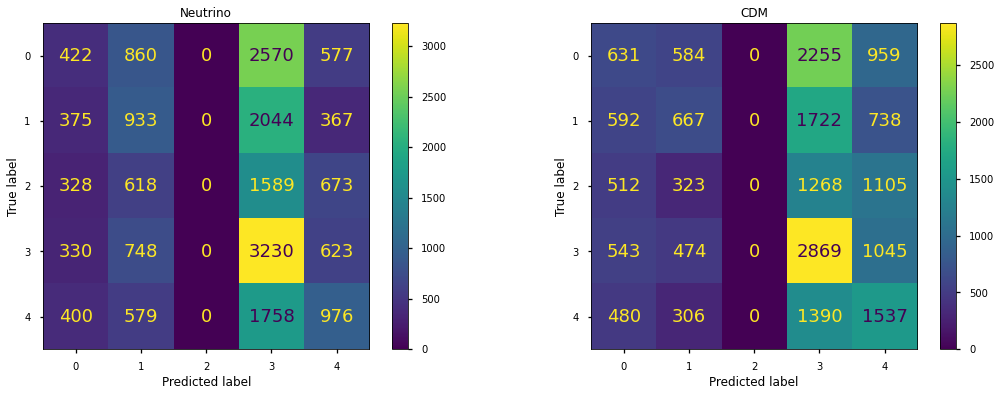

In [ ]:
print(f'Best Accuracy on Neutrino: {best_n}')
print(clf_report_n)
print('-'*20)

print(f'Best Accuracy on CDM: {best_CDM}')
print(clf_report_CDM)

fig = plt.figure(figsize=(18,6))

disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_n)
ax1 = fig.add_subplot(1,2,1, title='Neutrino')
disp1.plot(ax=ax1)

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_CDM)
ax2 = fig.add_subplot(1,2,2, title='CDM')
disp2.plot(ax=ax2)
plt.show()